<a href="https://colab.research.google.com/github/AdityaVarmaUddaraju/tensorflow_multiclass_classification/blob/master/multilabelclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-07-27 05:38:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   118MB/s    in 1.6s    

2019-07-27 05:38:29 (118 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-07-27 05:38:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/t

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [0]:
base_train_dir = '/tmp/rps'
base_valid_dir = '/tmp/rps-test-set'

In [0]:
train_paper_dir = os.path.join(base_train_dir, 'paper')
train_rock_dir = os.path.join(base_train_dir, 'rock')
train_scissors_dir = os.path.join(base_train_dir, 'scissors')

valid_paper_dir = os.path.join(base_valid_dir, 'paper')
valid_rock_dir = os.path.join(base_valid_dir, 'rock')
valid_scissors_dir = os.path.join(base_valid_dir, 'scissors')

In [5]:
print(os.listdir(train_paper_dir))

['paper05-067.png', 'paper03-062.png', 'paper05-091.png', 'paper01-094.png', 'paper03-111.png', 'paper05-105.png', 'paper01-002.png', 'paper01-040.png', 'paper03-045.png', 'paper02-045.png', 'paper06-055.png', 'paper04-057.png', 'paper05-055.png', 'paper06-070.png', 'paper06-100.png', 'paper01-103.png', 'paper02-042.png', 'paper06-093.png', 'paper02-098.png', 'paper03-000.png', 'paper03-094.png', 'paper07-084.png', 'paper07-096.png', 'paper04-032.png', 'paper06-009.png', 'paper05-087.png', 'paper04-038.png', 'paper06-010.png', 'paper07-021.png', 'paper02-024.png', 'paper04-006.png', 'paper01-073.png', 'paper05-041.png', 'paper01-076.png', 'paper03-087.png', 'paper02-028.png', 'paper05-020.png', 'paper06-112.png', 'paper01-018.png', 'paper07-056.png', 'paper01-051.png', 'paper03-044.png', 'paper03-099.png', 'paper04-003.png', 'paper06-078.png', 'paper06-034.png', 'paper02-105.png', 'paper01-000.png', 'paper05-111.png', 'paper07-008.png', 'paper05-097.png', 'paper06-087.png', 'paper05-00

In [6]:
len(os.listdir(train_paper_dir))

840

In [7]:
len(os.listdir(valid_paper_dir))

124

In [10]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip = True,
                                  fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(base_train_dir,
                                                       batch_size=20,
                                                       class_mode='categorical',
                                                       target_size=(150,150))
validation_generator = valid_datagen.flow_from_directory(base_valid_dir,
                                                        batch_size=20,
                                                        class_mode = 'categorical',
                                                        target_size=(150,150))

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['acc'])

In [15]:
history = model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             epochs = 25,
                             verbose = 2)

Epoch 1/25
126/126 - 24s - loss: 1.0913 - acc: 0.3698 - val_loss: 0.9030 - val_acc: 0.5672
Epoch 2/25
126/126 - 19s - loss: 0.7974 - acc: 0.6202 - val_loss: 0.4359 - val_acc: 0.7823
Epoch 3/25
126/126 - 19s - loss: 0.4390 - acc: 0.8202 - val_loss: 0.1056 - val_acc: 0.9597
Epoch 4/25
126/126 - 19s - loss: 0.2986 - acc: 0.8885 - val_loss: 0.2420 - val_acc: 0.9140
Epoch 5/25
126/126 - 20s - loss: 0.1799 - acc: 0.9341 - val_loss: 0.0779 - val_acc: 0.9785
Epoch 6/25
126/126 - 19s - loss: 0.1869 - acc: 0.9341 - val_loss: 0.1234 - val_acc: 0.9435
Epoch 7/25
126/126 - 19s - loss: 0.1501 - acc: 0.9437 - val_loss: 0.1396 - val_acc: 0.9570
Epoch 8/25
126/126 - 19s - loss: 0.1068 - acc: 0.9643 - val_loss: 0.0556 - val_acc: 0.9731
Epoch 9/25
126/126 - 19s - loss: 0.1318 - acc: 0.9520 - val_loss: 0.0364 - val_acc: 0.9839
Epoch 10/25
126/126 - 20s - loss: 0.1069 - acc: 0.9627 - val_loss: 0.0434 - val_acc: 0.9839
Epoch 11/25
126/126 - 19s - loss: 0.0899 - acc: 0.9683 - val_loss: 0.2499 - val_acc: 0.89

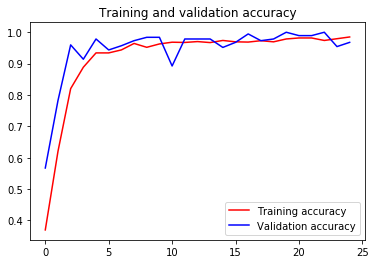

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()